In [487]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', None)



In [488]:
data = pd.read_csv('data/train.csv')

In [489]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Normalizing title

In [490]:
data['Title'] = data['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
data['GivenName'] = data['Name'].str.split(',').str[1].str.split('.').str[1].str.split('\(')\
                     .str[0].str.strip()
data['FamilyName'] = data['Name'].str.split(',').str[0].str.strip()

def process_title(original_title):
    title_dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
    return title_dictionary.get(original_title) or 'Unknown'

data.Title = np.vectorize(process_title)(data.Title)    

Filling age by title

In [491]:
AGE_TITLE_MAPPING = data.groupby(['Title'])['Age'].median().reset_index(name="age_med").to_dict()
AGE_TITLE_MAPPING['Unknown']=29

def process_age(age_val, title_val):
    res = age_val
    if math.isnan(res):
        res = AGE_TITLE_MAPPING.get(title_val) or AGE_TITLE_MAPPING.get("Unknown")
    return res

data.Age = np.vectorize(process_age)(data.Age, data.Title)


In [492]:
data[data.Embarked != 'S'][data.Embarked != 'Q'][data.Embarked != 'C']

/root/lab/27py/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,GivenName,FamilyName
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,Amelie,Icard
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,George Nelson,Stone


Fill embarked

In [493]:
data.groupby(['Pclass','Embarked']).count().PassengerId

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: PassengerId, dtype: int64

In [494]:
# embarked at 'S' is the most in every class
data.Embarked.fillna('S', inplace=True)

Processing cabin

In [495]:
def check_cabin(cabin_num):
#     print cabin_num
    return 'Yes' if str(cabin_num) != 'nan' else 'No'

data['HasCabinNum'] = np.vectorize(check_cabin)(data.Cabin)


In [496]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,GivenName,FamilyName,HasCabinNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen Harris,Braund,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John Bradley,Cumings,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen,No
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques Heath,Futrelle,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William Henry,Allen,No


Is Adult

In [497]:
def check_physical(age_val):
    res = ''
    if age_val >= 16:
        if age_val >= 60:
            res = 'Old_Man'
        else:
            res = 'Adult'
    else:
        res = 'Child'    
    return  res

data['Physical'] = np.vectorize(check_physical)(data.Age)



Royal class

In [498]:
def check_class(title_val):
#     print cabin_num
    return 'Noble' if title_val == 'Royalty' else 'Civilian'

data['Class'] = np.vectorize(check_class)(data.Title)

In [499]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
GivenName      891 non-null object
FamilyName     891 non-null object
HasCabinNum    891 non-null object
Physical       891 non-null object
Class          891 non-null object
dtypes: float64(2), int64(5), object(11)
memory usage: 125.4+ KB


In [500]:
target_col = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'GivenName', 'FamilyName'], axis=1)
target_col.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,HasCabinNum,Physical,Class
0,0,3,male,22.0,1,0,7.2500,S,Mr,No,Adult,Civilian
1,1,1,female,38.0,1,0,71.2833,C,Mrs,Yes,Adult,Civilian
2,1,3,female,26.0,0,0,7.9250,S,Miss,No,Adult,Civilian
3,1,1,female,35.0,1,0,53.1000,S,Mrs,Yes,Adult,Civilian
4,0,3,male,35.0,0,0,8.0500,S,Mr,No,Adult,Civilian


In [501]:
dummies_Class = pd.get_dummies(target_col['Class'], prefix= 'Class')
dummies_Physical = pd.get_dummies(target_col['Physical'], prefix= 'Physical')
dummies_Title = pd.get_dummies(target_col['Title'], prefix= 'Title')
dummies_Cabin = pd.get_dummies(target_col['HasCabinNum'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(target_col['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(target_col['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(target_col['Pclass'], prefix= 'Pclass')

df = pd.concat([target_col, dummies_Physical,dummies_Class, dummies_Title, dummies_Cabin, dummies_Embarked,\
                dummies_Sex, dummies_Pclass], axis=1)

df.drop(['Pclass', 'Sex','HasCabinNum', 'Embarked', 'Title', 'HasCabinNum',\
        'Physical', 'Class' ], axis=1, inplace=True)

df.info()
# print df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
Survived            891 non-null int64
Age                 891 non-null float64
SibSp               891 non-null int64
Parch               891 non-null int64
Fare                891 non-null float64
Physical_Adult      891 non-null uint8
Physical_Child      891 non-null uint8
Physical_Old_Man    891 non-null uint8
Class_Civilian      891 non-null uint8
Class_Noble         891 non-null uint8
Title_Master        891 non-null uint8
Title_Miss          891 non-null uint8
Title_Mr            891 non-null uint8
Title_Mrs           891 non-null uint8
Title_Officer       891 non-null uint8
Title_Royalty       891 non-null uint8
Cabin_No            891 non-null uint8
Cabin_Yes           891 non-null uint8
Embarked_C          891 non-null uint8
Embarked_Q          891 non-null uint8
Embarked_S          891 non-null uint8
Sex_female          891 non-null uint8
Sex_male            891 non-null 

In [502]:
df.head(3)

,Survived,Age,SibSp,Parch,Fare,Physical_Adult,Physical_Child,Physical_Old_Man,Class_Civilian,Class_Noble,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1


Normalization

In [503]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(df[['Age', 'Fare', 'SibSp', 'Parch']])

In [504]:
df.head(5)
# df.values[:,4:]

,Survived,Age,SibSp,Parch,Fare,Physical_Adult,Physical_Child,Physical_Old_Man,Class_Civilian,Class_Noble,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,0.271174,0.125,0.0,0.014151,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1
1,1,0.472229,0.125,0.0,0.139136,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0
2,1,0.321438,0.000,0.0,0.015469,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1
3,1,0.434531,0.125,0.0,0.103644,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0
4,0,0.434531,0.000,0.0,0.015713,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1


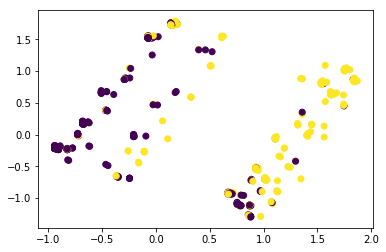

In [505]:
from sklearn.decomposition import PCA
df_reduce = PCA(n_components=2).fit_transform(df.values[:,1:])
df_reduce

plt.scatter(df_reduce[:,0],df_reduce[:,1], c=df.values[:,0])
plt.show()
# # df.info()

In [506]:
df_reduce

array([[-0.93563448, -0.21405666],
       [ 1.75080014,  1.01894103],
       [ 0.75519858, -1.08608193],
       ..., 
       [ 0.77095083, -1.09431244],
       [ 0.13960428,  1.72359588],
       [-0.82275984, -0.22614324]])

In [507]:
from sklearn.cross_validation import train_test_split
df_train ,df_test = train_test_split(df,test_size=0.2)
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
y_pred = mnb.fit(df_train.values[:,4:], df_train.values[:,0]).predict(df_test.values[:,4:])
y_pred

print("Number of mislabeled points out of a total %d points : %d"\
     % (df_test.values.shape[0],(df_test.values[:,0] != y_pred).sum()))

Number of mislabeled points out of a total 179 points : 42


In [508]:
32.0/179

0.1787709497206704

In [509]:
data_test = pd.read_csv('data/test.csv')
# Fill some one is in Pclass 3 but Fare is NaN
data_test['Fare'].fillna(8.0, inplace=True)
data_test['Title'] = data_test['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
data_test['GivenName'] = data_test['Name'].str.split(',').str[1].str.split('.').str[1].str.split('\(')\
                     .str[0].str.strip()
data_test['FamilyName'] = data_test['Name'].str.split(',').str[0].str.strip()
data_test.Title = np.vectorize(process_title)(data_test.Title)
data_test.Age = np.vectorize(process_age)(data_test.Age, data_test.Title)

data_test[data_test.Embarked != 'S'][data_test.Embarked != 'Q'][data_test.Embarked != 'C']
data_test.Embarked.fillna('S', inplace=True)
data_test['HasCabinNum'] = np.vectorize(check_cabin)(data_test.Cabin)

data_test['Physical'] = np.vectorize(check_physical)(data_test.Age)

data_test['Class'] = np.vectorize(check_class)(data_test.Title)
target_test_col = data_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'GivenName', 'FamilyName'], axis=1)
dummies_Class = pd.get_dummies(target_test_col['Class'], prefix= 'Class')
dummies_Physical = pd.get_dummies(target_test_col['Physical'], prefix= 'Physical')
dummies_Title = pd.get_dummies(target_test_col['Title'], prefix= 'Title')
dummies_Cabin = pd.get_dummies(target_test_col['HasCabinNum'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(target_test_col['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(target_test_col['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(target_test_col['Pclass'], prefix= 'Pclass')

df_test = pd.concat([target_test_col, dummies_Physical,dummies_Class, dummies_Title, dummies_Cabin, dummies_Embarked,\
                dummies_Sex, dummies_Pclass], axis=1)

df_test.drop(['Pclass', 'Sex','HasCabinNum', 'Embarked', 'Title', 'HasCabinNum',\
        'Physical', 'Class' ], axis=1, inplace=True)
scaler = MinMaxScaler()
df_test[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(df_test[['Age', 'Fare', 'SibSp', 'Parch']])
df_test.head(5)

/root/lab/27py/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,Age,SibSp,Parch,Fare,Physical_Adult,Physical_Child,Physical_Old_Man,Class_Civilian,Class_Noble,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0.452723,0.000,0.000000,0.015282,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
1,0.617566,0.125,0.000000,0.013663,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1
2,0.815377,0.000,0.000000,0.018909,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
3,0.353818,0.000,0.000000,0.016908,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1
4,0.287881,0.125,0.111111,0.023984,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1


In [510]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
predictions = gnb.fit(df.values[:,1:], df.values[:,0]).predict(df_test.values)
predictions
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
# result.to_csv("/root/lab/27py/ipynb/titanic/data/naive_bayesian_GaussianNB_predictions.csv", index=False)
# 76.5% using Naive Bayes no matter it's Gaussian or Multinomial

predictions

array([ 0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0

In [511]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
Age                 418 non-null float64
SibSp               418 non-null float64
Parch               418 non-null float64
Fare                418 non-null float64
Physical_Adult      418 non-null uint8
Physical_Child      418 non-null uint8
Physical_Old_Man    418 non-null uint8
Class_Civilian      418 non-null uint8
Class_Noble         418 non-null uint8
Title_Master        418 non-null uint8
Title_Miss          418 non-null uint8
Title_Mr            418 non-null uint8
Title_Mrs           418 non-null uint8
Title_Officer       418 non-null uint8
Title_Royalty       418 non-null uint8
Cabin_No            418 non-null uint8
Cabin_Yes           418 non-null uint8
Embarked_C          418 non-null uint8
Embarked_Q          418 non-null uint8
Embarked_S          418 non-null uint8
Sex_female          418 non-null uint8
Sex_male            418 non-null uint8
Pclass_1            418 non-n

In [512]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

train_features = df.values[:,1:].copy()
train_labels = df.values[:,0].copy()

model = Sequential()
model.add(Dense(units=40, input_dim=25, kernel_initializer='uniform', activation='relu'))
# model.add(Dropout(rate=0.05))
model.add(Dense(units=20, kernel_initializer='uniform', activation='relu'))
# model.add(Dropout(rate=0.05))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

train_history = model.fit(x=train_features, \
                          y=train_labels, \
                          validation_split=0.05, \
                          epochs=100, \
                          batch_size=20, verbose=2)

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# show_train_history(train_history, 'acc', 'val_acc')
# show_train_history(train_history, 'loss', 'val_loss')


pred = model.predict_classes(df_test.values, verbose=2)
# pred.ravel()
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':pred.ravel().astype(np.int32)})
result
result.to_csv("/root/lab/27py/ipynb/titanic/data/keras_mlp_predictions.csv", index=False)



Train on 846 samples, validate on 45 samples
Epoch 1/100
1s - loss: 0.5354 - acc: 0.7506 - val_loss: 0.3965 - val_acc: 0.8222
Epoch 2/100
0s - loss: 0.4537 - acc: 0.8085 - val_loss: 0.3197 - val_acc: 0.9111
Epoch 3/100
0s - loss: 0.4139 - acc: 0.8286 - val_loss: 0.2979 - val_acc: 0.8444
Epoch 4/100
0s - loss: 0.4106 - acc: 0.8274 - val_loss: 0.2810 - val_acc: 0.8889
Epoch 5/100
0s - loss: 0.4112 - acc: 0.8298 - val_loss: 0.2610 - val_acc: 0.8889
Epoch 6/100
0s - loss: 0.4079 - acc: 0.8298 - val_loss: 0.3945 - val_acc: 0.8667
Epoch 7/100
0s - loss: 0.4146 - acc: 0.8286 - val_loss: 0.2770 - val_acc: 0.8667
Epoch 8/100
0s - loss: 0.4009 - acc: 0.8369 - val_loss: 0.3013 - val_acc: 0.8889
Epoch 9/100
0s - loss: 0.3948 - acc: 0.8357 - val_loss: 0.2879 - val_acc: 0.8667
Epoch 10/100
0s - loss: 0.3973 - acc: 0.8286 - val_loss: 0.3345 - val_acc: 0.8889
Epoch 11/100
0s - loss: 0.3975 - acc: 0.8357 - val_loss: 0.3792 - val_acc: 0.8889
Epoch 12/100
0s - loss: 0.4130 - acc: 0.8392 - val_loss: 0.278

Still 76~78% when drop some features

In [416]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(df.loc[:, df.columns != 'Survived'], df.Survived)
clf


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [417]:
df.loc[:, df.columns != 'Survived'].columns

Index([u'Age', u'SibSp', u'Parch', u'Fare', u'Physical_Adult',
       u'Physical_Child', u'Physical_Old_Man', u'Class_Civilian',
       u'Class_Noble', u'Title_Master', u'Title_Miss', u'Title_Mr',
       u'Title_Mrs', u'Title_Officer', u'Title_Royalty', u'Cabin_No',
       u'Cabin_Yes', u'Embarked_C', u'Embarked_Q', u'Embarked_S',
       u'Sex_female', u'Sex_male', u'Pclass_1', u'Pclass_2', u'Pclass_3'],
      dtype='object')

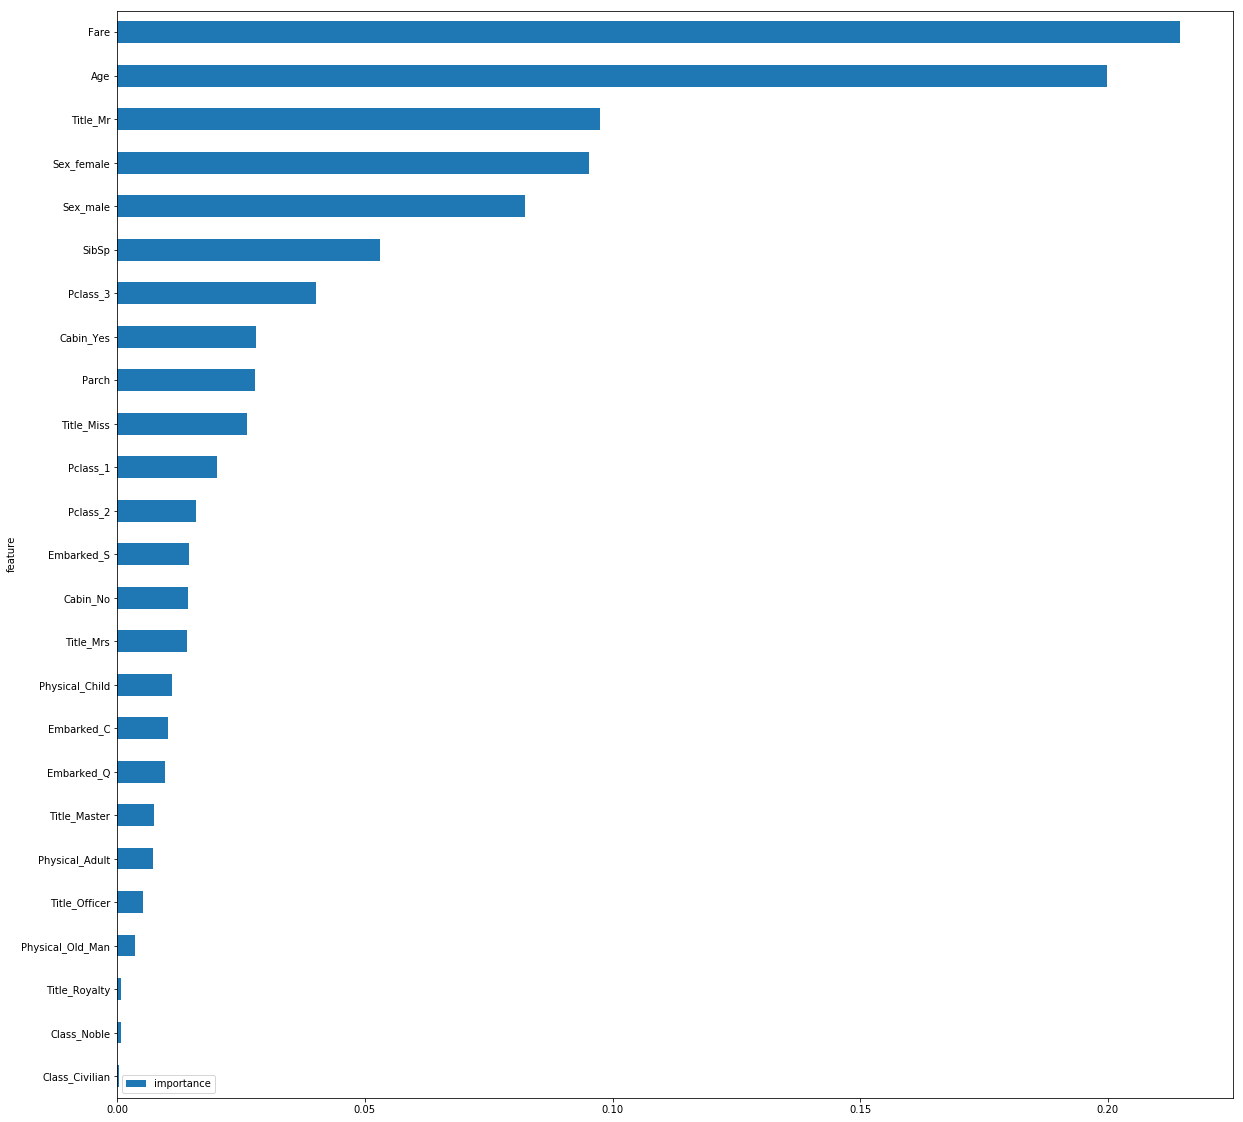

In [418]:
features = pd.DataFrame()
features['feature'] = df.loc[:, df.columns != 'Survived'].columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))
plt.show()

In [513]:
rf_model = SelectFromModel(clf, prefit=True)
train_reduced = rf_model.transform(df.loc[:, df.columns != 'Survived'])
train_reduced.shape

(891, 7)

In [514]:
test_reduced = rf_model.transform(df_test)
test_reduced.shape
test_reduced

array([[ 0.4527232 ,  0.        ,  0.01528158, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.61756561,  0.125     ,  0.01366309, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.8153765 ,  0.        ,  0.01890874, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [ 0.50547277,  0.        ,  0.01415106, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.38019254,  0.        ,  0.01571255, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.38019254,  0.125     ,  0.0436405 , ...,  0.        ,
         1.        ,  1.        ]])

In [516]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

train_features = df.values[:,1:]
train_labels = df.values[:,0]

model = Sequential()
model.add(Dense(units=40, input_dim=7, kernel_initializer='uniform', activation='relu'))
# model.add(Dropout(rate=0.05))
model.add(Dense(units=20, kernel_initializer='uniform', activation='relu'))
# model.add(Dropout(rate=0.05))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

train_history = model.fit(x=train_reduced, \
                          y=train_labels, \
                          validation_split=0.05, \
                          epochs=100, \
                          batch_size=20, verbose=2)

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# show_train_history(train_history, 'acc', 'val_acc')
# show_train_history(train_history, 'loss', 'val_loss')


pred = model.predict_classes(test_reduced, verbose=2)
# pred.ravel()
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':pred.ravel().astype(np.int32)})
result
result.to_csv("/root/lab/27py/ipynb/titanic/data/reducing_feature_keras_mlp_predictions.csv", index=False)



Train on 846 samples, validate on 45 samples
Epoch 1/100
1s - loss: 0.5800 - acc: 0.7009 - val_loss: 0.4513 - val_acc: 0.8000
Epoch 2/100
0s - loss: 0.4925 - acc: 0.7967 - val_loss: 0.3938 - val_acc: 0.8222
Epoch 3/100
0s - loss: 0.4740 - acc: 0.7991 - val_loss: 0.3921 - val_acc: 0.8000
Epoch 4/100
0s - loss: 0.4529 - acc: 0.8014 - val_loss: 0.3772 - val_acc: 0.8000
Epoch 5/100
0s - loss: 0.4404 - acc: 0.8073 - val_loss: 0.3911 - val_acc: 0.8000
Epoch 6/100
0s - loss: 0.4338 - acc: 0.7967 - val_loss: 0.3618 - val_acc: 0.8222
Epoch 7/100
0s - loss: 0.4354 - acc: 0.8109 - val_loss: 0.3832 - val_acc: 0.8222
Epoch 8/100
0s - loss: 0.4371 - acc: 0.8109 - val_loss: 0.3953 - val_acc: 0.7778
Epoch 9/100
0s - loss: 0.4330 - acc: 0.8085 - val_loss: 0.4025 - val_acc: 0.7778
Epoch 10/100
0s - loss: 0.4376 - acc: 0.8215 - val_loss: 0.3756 - val_acc: 0.8222
Epoch 11/100
0s - loss: 0.4356 - acc: 0.8144 - val_loss: 0.3613 - val_acc: 0.8222
Epoch 12/100
0s - loss: 0.4317 - acc: 0.8168 - val_loss: 0.384

In [615]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

rf_df = df.copy()
train_features = rf_df.values[:,1:]
train_labels = rf_df.values[:,0]
train_features_df = rf_df.loc[:, rf_df.columns != 'Survived']

train_features_df['GangSize'] = 1
train_features_df['GangSize'] = train_features_df['GangSize']+train_features_df['Parch']+\
                                train_features_df['SibSp']

# Using feature_importances_ check and pick
# train_features_df = train_features_df[['Fare','Age', 'Title_Mr', 'Sex_male', 'Sex_female',\
#                                       'GangSize', 'Pclass_3', 'SibSp']]
features_forest = train_features_df.values
target = df.Survived.values


# # Tuning hyper-parameters
# sample_leaf_options = [0.2, 0.4, 0.6, 0.8, 1.0]
# min_samples_split =[2,4,16,32,64,128]


# for leaf_size in sample_leaf_options :

#     forest = RandomForestClassifier(max_depth=16,n_estimators = 600, min_samples_split=2, \
#                                     random_state = 1, max_features=leaf_size, min_samples_leaf=1,\
#                                    oob_score = True)
#     my_forest = forest.fit(features_forest, target)
#     print "AUC - ROC : ", roc_auc_score(target,my_forest.predict(features_forest))
    
forest = RandomForestClassifier(max_depth=16,n_estimators = 600, min_samples_split=2, \
                                    random_state = 1, max_features='sqrt', min_samples_leaf=1,\
                                   oob_score = True)
my_forest = forest.fit(features_forest, target)
print "AUC - ROC : ", roc_auc_score(target,my_forest.predict(features_forest))

print(my_forest.score(features_forest, target))

# print(train_features_df.columns.values)
# print(my_forest.feature_importances_)
a = train_features_df.columns.values
b = my_forest.feature_importances_
# print(np.array(list(zip(a,b))))

pair = np.array(list(zip(a,b)))
print(pair[pair[:,1].argsort(kind='mergesort')[::-1][:30]])

rf_df["eval_forest"] = my_forest.predict(features_forest)

rmse_tree = np.sqrt(mean_squared_error(rf_df["Survived"], rf_df["eval_forest"]))
print("RMSE:", rmse_tree)


test_features_df = df_test.copy()
test_features_df.info()
test_features_df['GangSize'] = 1
test_features_df['GangSize'] = test_features_df['GangSize']+test_features_df['Parch']+\
                                test_features_df['SibSp']
    
# test_features_df = test_features_df[['Fare','Age', 'Title_Mr', 'Sex_male', 'Sex_female',\
#                                       'GangSize', 'Pclass_3', 'SibSp']]

rf_prediction = my_forest.predict(test_features_df.values)

rf_solution = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':rf_prediction.ravel().astype(np.int32)})

result.to_csv("/root/lab/27py/ipynb/titanic/data/reducing_feature_random_forest_predictions.csv", index=False)




AUC - ROC :  0.963642028569
0.970819304153
[['Fare' '0.193716120246']
 ['Age' '0.183193126479']
 ['Title_Mr' '0.0998415726802']
 ['Sex_male' '0.0927853900816']
 ['Sex_female' '0.0856580216297']
 ['GangSize' '0.0561898386098']
 ['Pclass_3' '0.0436236723688']
 ['SibSp' '0.0325286020794']
 ['Title_Mrs' '0.0235111416883']
 ['Cabin_Yes' '0.0230446939994']
 ['Cabin_No' '0.0223906062307']
 ['Title_Miss' '0.0220596685196']
 ['Parch' '0.0181197028149']
 ['Pclass_1' '0.0175132404427']
 ['Pclass_2' '0.0146811076123']
 ['Embarked_S' '0.0140480137008']
 ['Embarked_C' '0.0120173952105']
 ['Title_Master' '0.00938227358821']
 ['Embarked_Q' '0.00863140870718']
 ['Physical_Child' '0.00821091095756']
 ['Physical_Adult' '0.00812110372944']
 ['Title_Officer' '0.00571273398096']
 ['Physical_Old_Man' '0.0033356098286']
 ['Class_Noble' '0.000580193355821']
 ['Title_Royalty' '0.000557368510939']
 ['Class_Civilian' '0.000546482947509']]
('RMSE:', 0.17082358106351275)
<class 'pandas.core.frame.DataFrame'>
RangeI